In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"C:\Users\bhara\Downloads\student\student-mat.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


,school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0,"GP;""F"";18;""U"";""GT3"";""A"";4;4;""at_home"";""teacher..."
1,"GP;""F"";17;""U"";""GT3"";""T"";1;1;""at_home"";""other"";..."
2,"GP;""F"";15;""U"";""LE3"";""T"";1;1;""at_home"";""other"";..."
3,"GP;""F"";15;""U"";""GT3"";""T"";4;2;""health"";""services..."
4,"GP;""F"";16;""U"";""GT3"";""T"";3;3;""other"";""other"";""h..."


In [6]:
# Reloading the dataset with the correct delimiter
df = pd.read_csv(file_path, delimiter=";")

# Display the first few rows again
df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [7]:
# Check for missing values
missing_values = df.isnull().sum()

# Check data types and dataset size
data_types = df.dtypes
dataset_size = df.shape

missing_values, data_types, dataset_size


(school        0
 sex           0
 age           0
 address       0
 famsize       0
 Pstatus       0
 Medu          0
 Fedu          0
 Mjob          0
 Fjob          0
 reason        0
 guardian      0
 traveltime    0
 studytime     0
 failures      0
 schoolsup     0
 famsup        0
 paid          0
 activities    0
 nursery       0
 higher        0
 internet      0
 romantic      0
 famrel        0
 freetime      0
 goout         0
 Dalc          0
 Walc          0
 health        0
 absences      0
 G1            0
 G2            0
 G3            0
 dtype: int64,
 school        object
 sex           object
 age            int64
 address       object
 famsize       object
 Pstatus       object
 Medu           int64
 Fedu           int64
 Mjob          object
 Fjob          object
 reason        object
 guardian      object
 traveltime     int64
 studytime      int64
 failures       int64
 schoolsup     object
 famsup        object
 paid          object
 activities    object
 nurse

In [8]:
# Check for duplicate entries
duplicate_count = df.duplicated().sum()

# Remove duplicates if any
df_cleaned = df.drop_duplicates()

# New dataset size after removing duplicates
new_dataset_size = df_cleaned.shape

duplicate_count, new_dataset_size


(0, (395, 33))

In [16]:
# 1. Average final grade (G3)
average_G3 = df_cleaned["G3"].mean()

# 2. Number of students scoring above 15 in G3
students_above_15 = (df_cleaned["G3"] > 15).sum()

# 3. Correlation between study time and final grade (G3)
correlation_studytime_G3 = df_cleaned["studytime"].corr(df_cleaned["G3"])

# 4. Average G3 by gender
average_G3_by_gender = df_cleaned.groupby("sex")["G3"].mean()

print(f"Average Final Grade (G3): {average_G3:.2f}")
print(f"Number of Students Scoring Above 15 in G3: {students_above_15}")
print(f"Correlation Between Study Time and Final Grade (G3): {correlation_studytime_G3:.2f}")
print("Average Final Grade (G3) by Gender:")
print(average_G3_by_gender)

Average Final Grade (G3): 10.42
Number of Students Scoring Above 15 in G3: 40
Correlation Between Study Time and Final Grade (G3): 0.10
Average Final Grade (G3) by Gender:
sex
F     9.966346
M    10.914439
Name: G3, dtype: float64


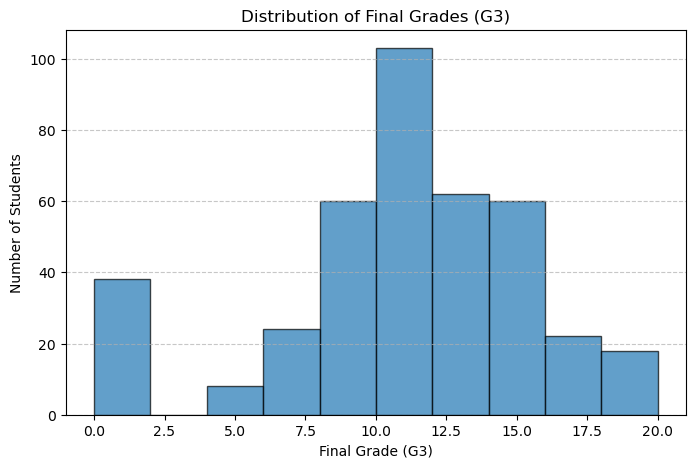

In [10]:
# 1. Histogram of final grades (G3)
plt.figure(figsize=(8, 5))
plt.hist(df_cleaned["G3"], bins=10, edgecolor="black", alpha=0.7)
plt.xlabel("Final Grade (G3)")
plt.ylabel("Number of Students")
plt.title("Distribution of Final Grades (G3)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


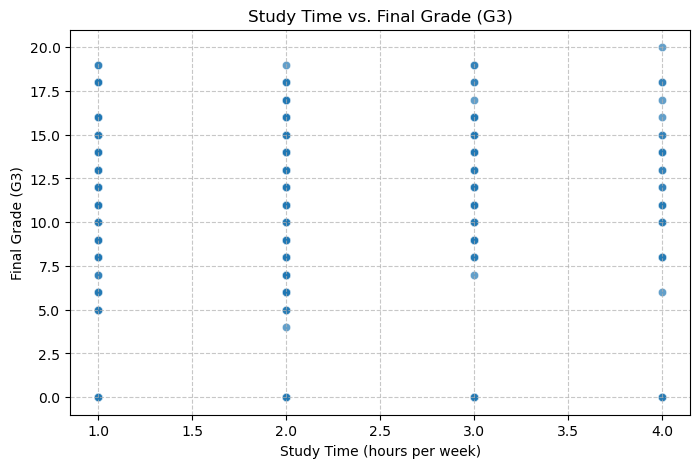

In [11]:
# 2. Scatter plot between study time and final grade (G3)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_cleaned["studytime"], y=df_cleaned["G3"], alpha=0.7)
plt.xlabel("Study Time (hours per week)")
plt.ylabel("Final Grade (G3)")
plt.title("Study Time vs. Final Grade (G3)")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


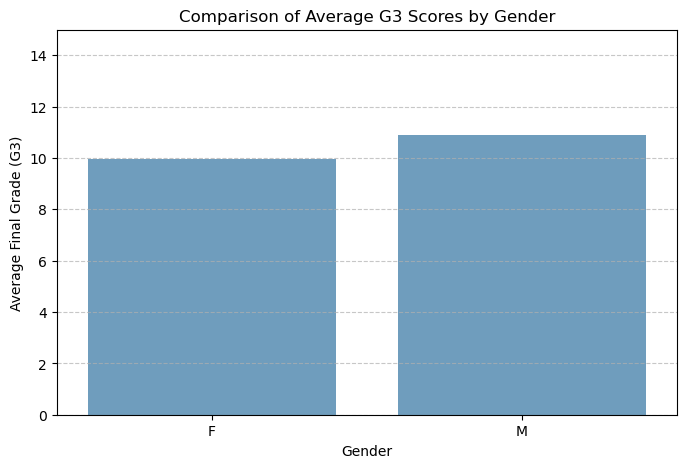

In [12]:
# 3. Bar chart comparing the average scores of male and female students
plt.figure(figsize=(8, 5))
sns.barplot(x=average_G3_by_gender.index, y=average_G3_by_gender.values, alpha=0.7)
plt.xlabel("Gender")
plt.ylabel("Average Final Grade (G3)")
plt.title("Comparison of Average G3 Scores by Gender")
plt.ylim(0, 15)  # Setting a reasonable limit for better visualization
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()
